In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

plt.style.use('fivethirtyeight')
color_palette = sns.color_palette()



import os
for dirname, _, filenames in os.walk('http://localhost:8888/tree/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import os
for dirname, _, filenames in os.walk('http://localhost:8888/tree/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
df = pd.read_csv("C:/Users/Chiamaka/Downloads/archive/PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

In [39]:
df.head()

,COMED_MW
Datetime,
2011-12-31 01:00:00,9970.0
2011-12-31 02:00:00,9428.0
2011-12-31 03:00:00,9059.0
2011-12-31 04:00:00,8817.0
2011-12-31 05:00:00,8743.0


In [40]:
sns.color_palette()

[(0.0, 0.5607843137254902, 0.8352941176470589),
 (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
 (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
 (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

<Axes: title={'center': 'PJME Energy use in MW'}, xlabel='Datetime'>

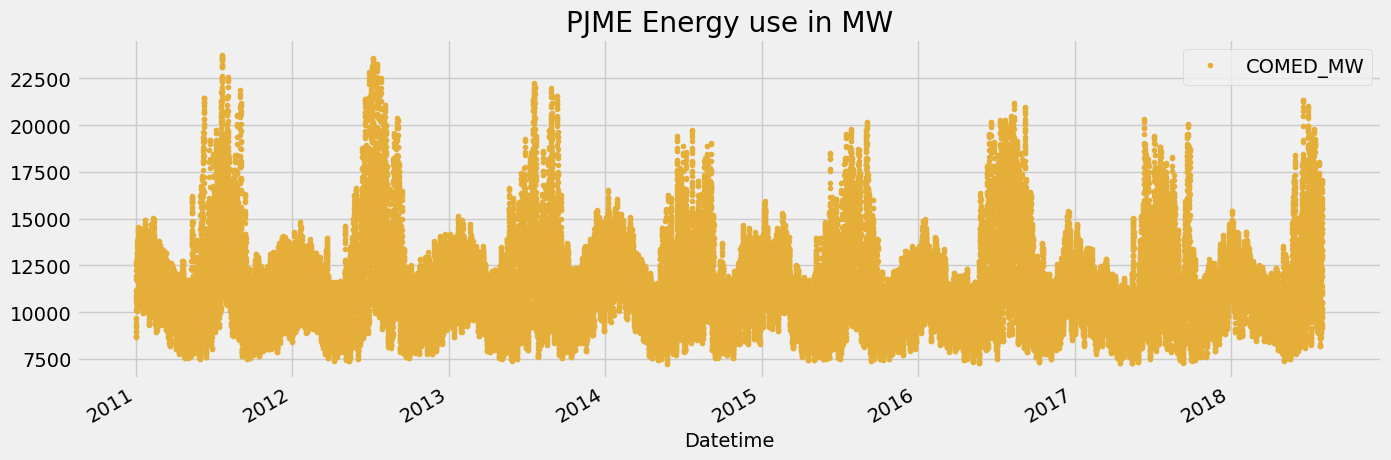

In [41]:
df.plot(style=".", 
        figsize=(15,5), 
        color=color_palette[-4], 
        title="PJME Energy use in MW")

In [42]:
df.index

DatetimeIndex(['2011-12-31 01:00:00', '2011-12-31 02:00:00',
               '2011-12-31 03:00:00', '2011-12-31 04:00:00',
               '2011-12-31 05:00:00', '2011-12-31 06:00:00',
               '2011-12-31 07:00:00', '2011-12-31 08:00:00',
               '2011-12-31 09:00:00', '2011-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=66497, freq=None)

In [43]:
df.index

DatetimeIndex(['2011-12-31 01:00:00', '2011-12-31 02:00:00',
               '2011-12-31 03:00:00', '2011-12-31 04:00:00',
               '2011-12-31 05:00:00', '2011-12-31 06:00:00',
               '2011-12-31 07:00:00', '2011-12-31 08:00:00',
               '2011-12-31 09:00:00', '2011-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=66497, freq=None)

In [44]:
train = df.loc[df.index < "01-01-2015"]
test = df.loc[df.index >= "01-01-2015"]

In [45]:
train.tail()

,COMED_MW
Datetime,
2014-01-01 20:00:00,13015.0
2014-01-01 21:00:00,12831.0
2014-01-01 22:00:00,12598.0
2014-01-01 23:00:00,12231.0
2014-01-02 00:00:00,11605.0


In [46]:
test.head()

,COMED_MW
Datetime,
2015-01-01 00:00:00,11774.0
2015-12-31 01:00:00,10419.0
2015-12-31 02:00:00,9893.0
2015-12-31 03:00:00,9544.0
2015-12-31 04:00:00,9341.0


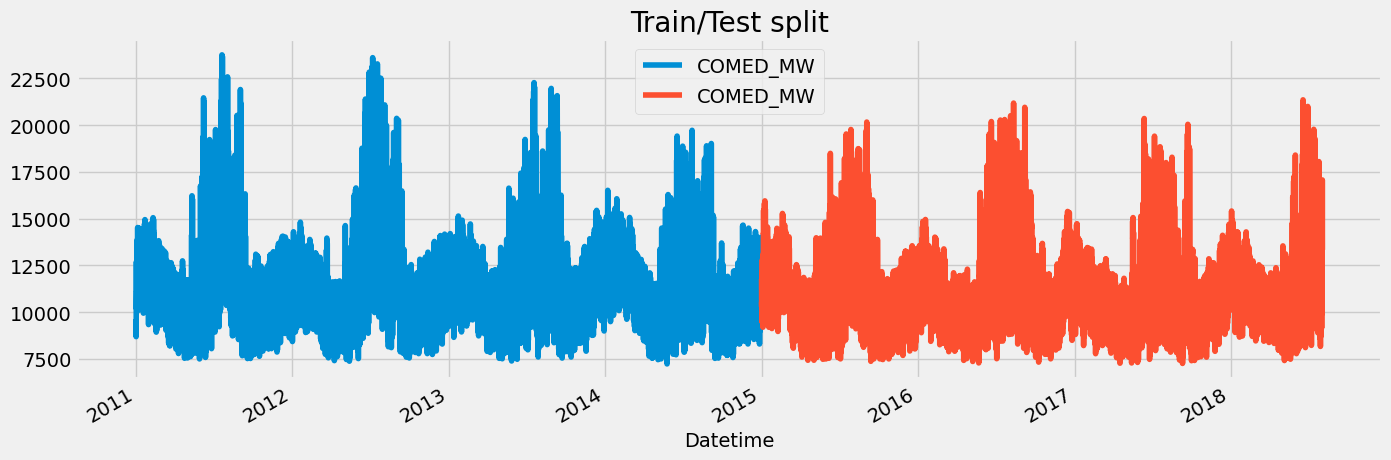

In [47]:
# plotting the data
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="training set", title="Train/Test split")
test.plot(ax=ax, label="test set")
#ax.axvline("01-01-2015", color="black", ls="-")
plt.show()

<Axes: title={'center': 'Week of data'}, xlabel='Datetime'>

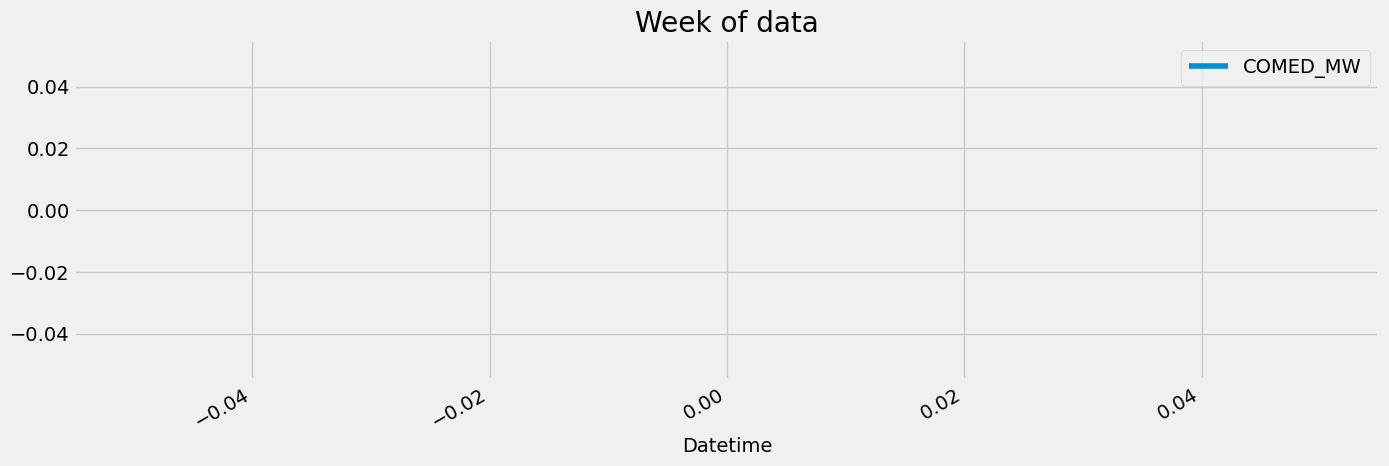

In [48]:
df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")].plot(figsize=(15,5), title="Week of data")

In [49]:


def create_features(df):
    """
    Creates timeseries features from time series index
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [50]:
df = create_features(df)

In [19]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


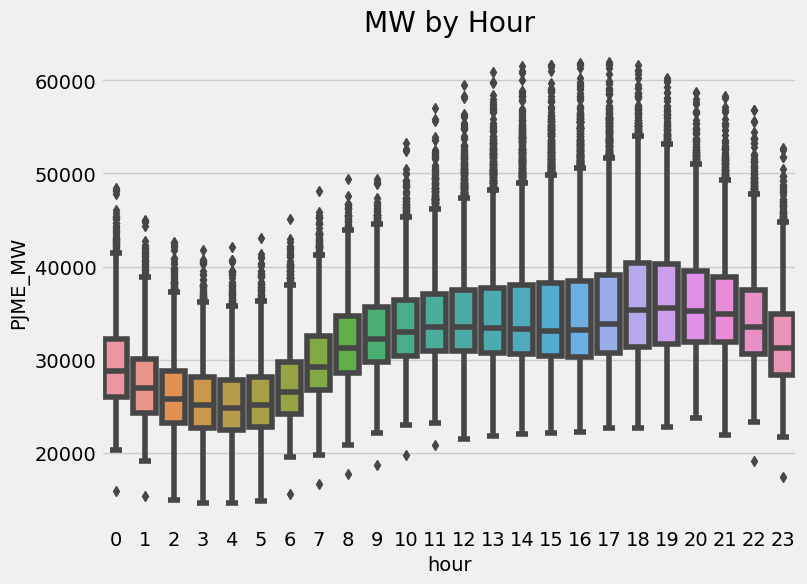

In [20]:
# Visualize Our Feature/Target Relationship
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title("MW by Hour")
plt.show()

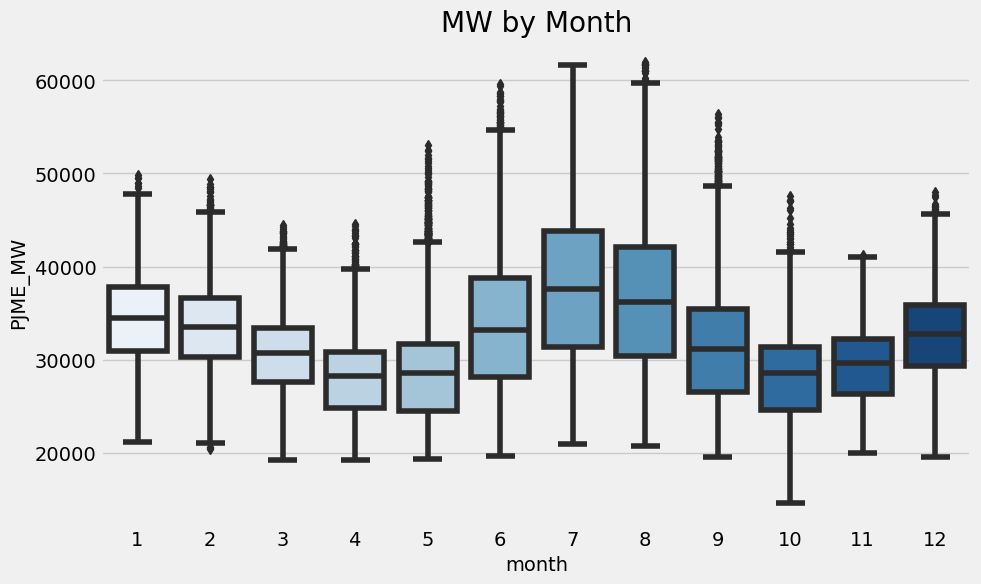

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title("MW by Month")
plt.show()

In [22]:
# Create our model
# Import our metrics
from sklearn.metrics import mean_squared_error

In [23]:
train = create_features(train)
test = create_features(test)

In [24]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'PJME_MW'

In [25]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [26]:
reg = xgb.XGBRegressor(n_estimators=1000, 
                       early_stopping_rounds=50,
                       learning_rate=0.01)
reg.fit(X_train, y_train, 
       eval_set=[(X_train, y_train), (X_test, y_test)],
       verbose=100)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[100]	validation_0-rmse:12342.17856	validation_1-rmse:11516.21767
[200]	validation_0-rmse:5373.20460	validation_1-rmse:5164.97392
[300]	validation_0-rmse:3375.48321	validation_1-rmse:3834.00707
[400]	validation_0-rmse:2884.85132	validation_1-rmse:3716.33146
[450]	validation_0-rmse:2771.93085	validation_1-rmse:3730.77469


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
fea_imp = pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['importance'])
fea_imp

,importance
hour,0.448804
dayofweek,0.158668
quarter,0.033319
month,0.228156
year,0.022634
dayofyear,0.108419


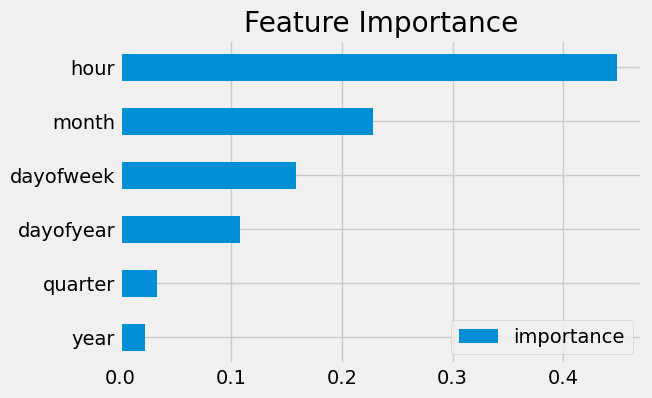

In [28]:
fea_imp.sort_values('importance').plot(kind='barh', 
                                       figsize=(6,4), 
                                       title="Feature Importance")
plt.show()

In [29]:
test['prediction'] = reg.predict(X_test)

In [30]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

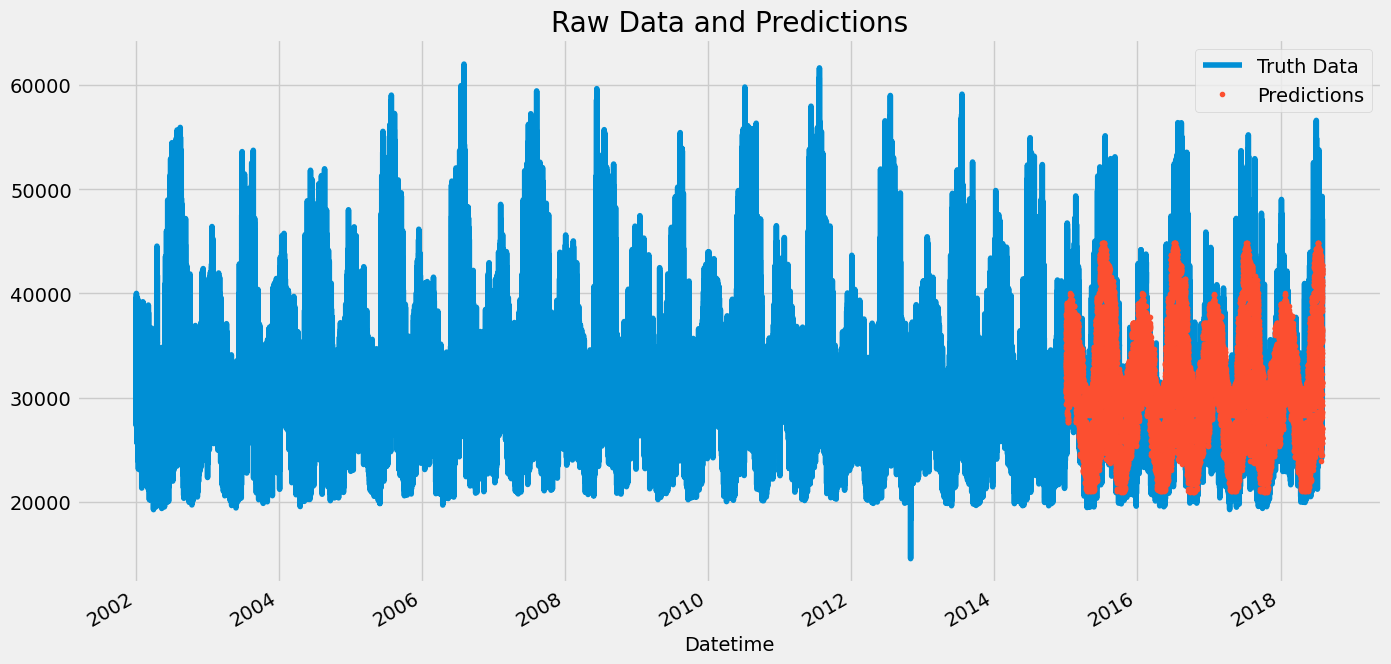

In [31]:
# Plotting the predictions
ax = df[['PJME_MW']].plot(figsize=(15,8))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()

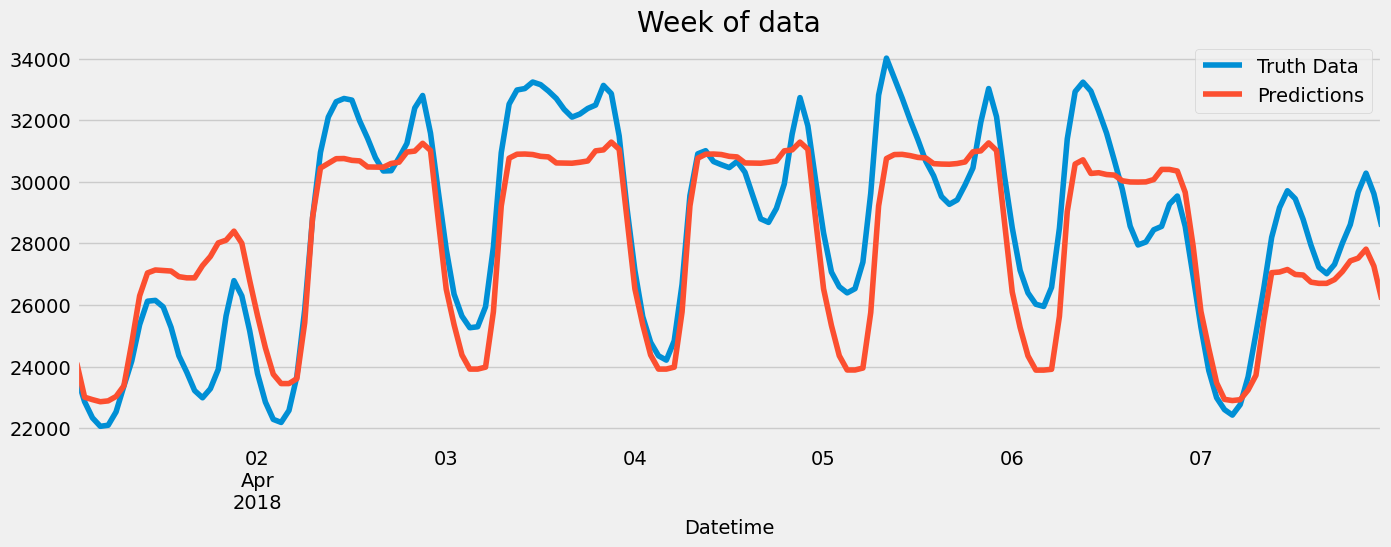

In [32]:
# Plot for one week data
ax = df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]['PJME_MW'].plot(figsize=(15,5), title="Week of data")
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]['prediction'].plot()
plt.legend(['Truth Data', 'Predictions'])

In [34]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE score on test set: {score:0.2f}')

RMSE score on test set: 3715.93


In [37]:
# Let's look at the Worst and Best Predicted days
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head()

date
2016-08-13    14577.210124
2016-08-14    14472.472738
2016-09-10    12494.880941
2016-08-12    11525.418376
2016-09-09    11369.640299
Name: error, dtype: float64